In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/NFRP_mz1000_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00007.00007.4,1,SPAKPVQTITPHGK/4,0.275,0.124,[2],0,0.009,5,0.139,...,-1,0,0,(),Normal,Unk,Unk,1,Target,253317212
1,b1906_293T_proteinID_01A_QE3_122212.00009.00009.2,1,PVTAYDGFVQYIPFDDPR/2,0.097,0.002,[2],0,0.496,22,0.045,...,-1,0,0,(),Normal,Unk,Unk,1,Target,214045757
2,b1906_293T_proteinID_01A_QE3_122212.00012.00012.2,1,MTELETAM[147]GMIIDVFSR/2,0.047,0.019,[2],0,0.496,7,0.028,...,-1,0,0,(),Normal,Unk,Unk,1,Target,193185583
3,b1906_293T_proteinID_01A_QE3_122212.00013.00013.3,1,DLEDGEVPQHAGK/3,0.306,0.075,[2],0,0.329,42,0.073,...,-1,0,0,(),Normal,Unk,Unk,1,Target,40185648
4,b1906_293T_proteinID_01A_QE3_122212.00014.00014.3,1,RKEEPAGLATR/3,0.163,0.003,[2],0,0.341,65,0.068,...,-1,0,0,(),Normal,Unk,Unk,1,Target,232447251


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/NFRP_mz1000_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,PMNVHMDPM[147]K/3,0.118,0.0488,[2],0,0.00271,9,0.0382,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,491259435
1,b1906_293T_proteinID_01A_QE3_122212.00002.00002.3,1,YQDGHAHK/3,0.026,0.0260,[2],0,0.00100,1,0.0260,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,414650095
2,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,YVVVPIR/2,0.147,0.0090,[2],0,-0.00300,26,0.0610,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,434671030
3,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,EQIEQAIEC[160]DQQELDKYK/2,0.108,0.0160,[2],0,0.50100,11,0.0480,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,601292668
4,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,MMASLLEASFPETDEMR/2,0.127,0.0250,[2],0,0.00700,12,0.0560,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,486784542


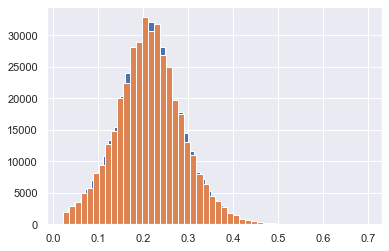

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.0127
0.01352


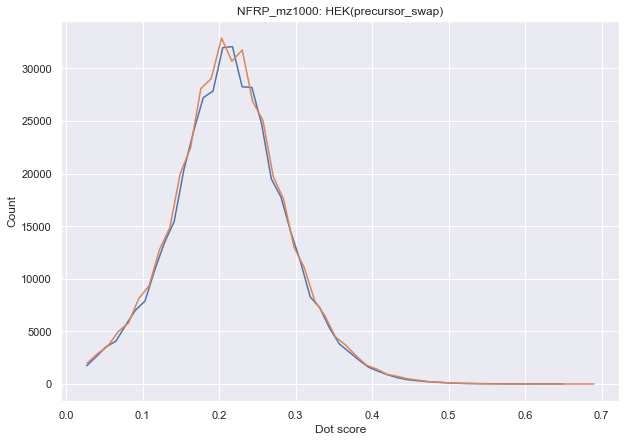

In [5]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NFRP_mz1000: HEK(precursor_swap)')
plt.plot(nnt1[1][:-1] + 0.006, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0065, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

415923
404174


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
"""

score:  0.001
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.002
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.003
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.004
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.005
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.006
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.007
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.008
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.009000000000000001
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.010000000000000002
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.011000000000000003
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.012000000000000004
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.013000000000000005
nnt:  415923
nnd:  404174
FDR:  0.9717519829391498


score:  0.014000000000000005
nnt:  415923
nnd:  404174

nnt:  387694
nnd:  376221
FDR:  0.9704070736199167


score:  0.10400000000000008
nnt:  387010
nnd:  375569
FDR:  0.9704374563964755


score:  0.10500000000000008
nnt:  386331
nnd:  374927
FDR:  0.9704812712415002


score:  0.10600000000000008
nnt:  385647
nnd:  374197
FDR:  0.9703096354956735


score:  0.10700000000000008
nnt:  384930
nnd:  373509
FDR:  0.9703296703296703


score:  0.10800000000000008
nnt:  384248
nnd:  372796
FDR:  0.970196331535883


score:  0.10900000000000008
nnt:  383519
nnd:  372051
FDR:  0.9700979612483345


score:  0.11000000000000008
nnt:  382784
nnd:  371349
FDR:  0.970126755559271


score:  0.11100000000000008
nnt:  382030
nnd:  370594
FDR:  0.9700651781273721


score:  0.11200000000000009
nnt:  381251
nnd:  369796
FDR:  0.9699541771693714


score:  0.11300000000000009
nnt:  380479
nnd:  369030
FDR:  0.969908983150187


score:  0.11400000000000009
nnt:  379664
nnd:  368262
FDR:  0.9699681823928527


score:  0.11500000000000009
nnt:  378839
nnd:  367484
FDR: 

nnt:  227292
nnd:  219324
FDR:  0.9649437727680693


score:  0.20600000000000016
nnt:  224747
nnd:  216952
FDR:  0.9653165559495789


score:  0.20700000000000016
nnt:  222290
nnd:  214513
FDR:  0.9650141706779433


score:  0.20800000000000016
nnt:  219815
nnd:  212108
FDR:  0.9649386984509701


score:  0.20900000000000016
nnt:  217351
nnd:  209738
FDR:  0.9649737061251156


score:  0.21000000000000016
nnt:  214928
nnd:  207395
FDR:  0.9649510533760143


score:  0.21100000000000016
nnt:  212396
nnd:  204954
FDR:  0.9649616753611179


score:  0.21200000000000016
nnt:  209921
nnd:  202475
FDR:  0.9645295134836438


score:  0.21300000000000016
nnt:  207462
nnd:  200016
FDR:  0.9641090898574197


score:  0.21400000000000016
nnt:  204962
nnd:  197674
FDR:  0.9644421892838673


score:  0.21500000000000016
nnt:  202446
nnd:  195417
FDR:  0.9652796301235885


score:  0.21600000000000016
nnt:  199932
nnd:  192956
FDR:  0.9651081367665006


score:  0.21700000000000016
nnt:  197388
nnd:  190654
FD

nnt:  38208
nnd:  37685
FDR:  0.9863117671691792


score:  0.3110000000000002
nnt:  37415
nnd:  36863
FDR:  0.9852465588667647


score:  0.3120000000000002
nnt:  36579
nnd:  36070
FDR:  0.9860849121080402


score:  0.3130000000000002
nnt:  35790
nnd:  35306
FDR:  0.9864766694607432


score:  0.3140000000000002
nnt:  35019
nnd:  34586
FDR:  0.9876352837031326


score:  0.3150000000000002
nnt:  34211
nnd:  33874
FDR:  0.9901493671626085


score:  0.3160000000000002
nnt:  33479
nnd:  33145
FDR:  0.9900235968816273


score:  0.3170000000000002
nnt:  32790
nnd:  32399
FDR:  0.9880756328148825


score:  0.3180000000000002
nnt:  32060
nnd:  31673
FDR:  0.9879288833437305


score:  0.31900000000000023
nnt:  31361
nnd:  31033
FDR:  0.9895411498357833


score:  0.32000000000000023
nnt:  30689
nnd:  30369
FDR:  0.9895728111049562


score:  0.32100000000000023
nnt:  29981
nnd:  29681
FDR:  0.9899936626530136


score:  0.32200000000000023
nnt:  29339
nnd:  29071
FDR:  0.9908654010020791


score:  0

nnt:  2824
nnd:  2950
FDR:  1.0446175637393769


score:  0.4170000000000003
nnt:  2755
nnd:  2880
FDR:  1.0453720508166968


score:  0.4180000000000003
nnt:  2679
nnd:  2809
FDR:  1.0485255692422546


score:  0.4190000000000003
nnt:  2606
nnd:  2741
FDR:  1.0518035303146585


score:  0.4200000000000003
nnt:  2528
nnd:  2668
FDR:  1.0553797468354431


score:  0.4210000000000003
nnt:  2470
nnd:  2592
FDR:  1.0493927125506073


score:  0.4220000000000003
nnt:  2424
nnd:  2523
FDR:  1.0408415841584158


score:  0.4230000000000003
nnt:  2364
nnd:  2457
FDR:  1.0393401015228427


score:  0.4240000000000003
nnt:  2299
nnd:  2388
FDR:  1.0387124836885602


score:  0.4250000000000003
nnt:  2235
nnd:  2328
FDR:  1.0416107382550335


score:  0.4260000000000003
nnt:  2175
nnd:  2269
FDR:  1.0432183908045978


score:  0.4270000000000003
nnt:  2118
nnd:  2204
FDR:  1.040604343720491


score:  0.4280000000000003
nnt:  2067
nnd:  2131
FDR:  1.03096274794388


score:  0.4290000000000003
nnt:  2023
nnd:

nnt:  120
nnd:  69
FDR:  0.575


score:  0.5390000000000004
nnt:  116
nnd:  66
FDR:  0.5689655172413793


score:  0.5400000000000004
nnt:  110
nnd:  62
FDR:  0.5636363636363636


score:  0.5410000000000004
nnt:  103
nnd:  60
FDR:  0.5825242718446602


score:  0.5420000000000004
nnt:  98
nnd:  57
FDR:  0.5816326530612245


score:  0.5430000000000004
nnt:  93
nnd:  57
FDR:  0.6129032258064516


score:  0.5440000000000004
nnt:  89
nnd:  55
FDR:  0.6179775280898876


score:  0.5450000000000004
nnt:  88
nnd:  54
FDR:  0.6136363636363636


score:  0.5460000000000004
nnt:  87
nnd:  54
FDR:  0.6206896551724138


score:  0.5470000000000004
nnt:  86
nnd:  54
FDR:  0.627906976744186


score:  0.5480000000000004
nnt:  84
nnd:  52
FDR:  0.6190476190476191


score:  0.5490000000000004
nnt:  82
nnd:  51
FDR:  0.6219512195121951


score:  0.5500000000000004
nnt:  81
nnd:  49
FDR:  0.6049382716049383


score:  0.5510000000000004
nnt:  80
nnd:  45
FDR:  0.5625


score:  0.5520000000000004
nnt:  79
nnd: 

ZeroDivisionError: division by zero